## Brian Ordonez
## 651146-3

## Problem 1: Data Download

__Default option__: you can use the `get_nba_data()` function. No additional work is needed.

In [1]:
import pandas as pd

def get_nba_data(endpt, params, return_url=False):

    ## endpt: https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation
    ## params: dictionary of parameters: i.e., {'LeagueID':'00'}
    
    from pandas import DataFrame
    from urllib.parse import urlencode
    import json
    
    useragent = "\"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9\""
    dataurl = "\"" + "http://stats.nba.com/stats/" + endpt + "?" + urlencode(params) + "\""
    
    # for debugging: just return the url
    if return_url:
        return(dataurl)
    
    jsonstr = !wget -q -O - --user-agent={useragent} {dataurl}
    
    data = json.loads(jsonstr[0])
    
    h = data['resultSets'][0]['headers']
    d = data['resultSets'][0]['rowSet']
    
    return(DataFrame(d, columns=h))

In [2]:
import pandas as pd

def get_nba_data2(endpt, params, return_url=False):

    ## endpt: https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation
    ## params: dictionary of parameters: i.e., {'LeagueID':'00'}
    
    from pandas import DataFrame
    from urllib.parse import urlencode
    import json
    
    useragent = "\"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9\""
    dataurl = "\"" + "http://stats.nba.com/stats/" + endpt + "?" + urlencode(params) + "\""
    
    # for debugging: just return the url
    if return_url:
        return(dataurl)
    
    jsonstr = !wget -q -O - --user-agent={useragent} {dataurl}
    
    data = json.loads(jsonstr[0])
    h=data['resultSet']['headers']
    d=data['resultSet']['rowSet']
    
    return(DataFrame(d, columns=h))

In [3]:
## get all teams
params = {'LeagueID':'00'}
teams = get_nba_data('commonTeamYears', params)

## get all players
params = {'LeagueID':'00', 'Season': '2016-17', 'IsOnlyCurrentSeason': '0'}
players = get_nba_data('commonallplayers', params)

##get all time leaders 
params ={'LeagueID':'00','SeasonType':'Playoffs','ActiveFlag':'No','PerMode':'PerGame','Scope':'S','Season':'All Time','SeasonType':'Playoffs','StatCategory':'PTS'}
alltimeleaders = get_nba_data2('leagueleaders',params)

In [4]:
teams.ABBREVIATION = teams.ABBREVIATION.astype('category')
teams.TEAM_ID      = teams.TEAM_ID.astype('category')
teams.MIN_YEAR     = teams.MIN_YEAR.astype('int')
teams.MAX_YEAR     = teams.MAX_YEAR.astype('int')

In [5]:
#subset current teams
teams = teams[teams.MAX_YEAR == 2017]
#teams2['TEAM_AGE'] = teams.MAX_YEAR - teams.MIN_YEAR
teams

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION
0,00,1610612737,1949,2017,ATL
1,00,1610612738,1946,2017,BOS
2,00,1610612739,1970,2017,CLE
3,00,1610612740,2002,2017,NOP
4,00,1610612741,1966,2017,CHI
5,00,1610612742,1980,2017,DAL
6,00,1610612743,1976,2017,DEN
7,00,1610612744,1946,2017,GSW
8,00,1610612745,1967,2017,HOU
9,00,1610612746,1970,2017,LAC


In [6]:
#subset just players on current teams
players = players[players.TEAM_ID.isin(teams.TEAM_ID)]
players.FROM_YEAR = players.FROM_YEAR.astype('int')
players.TO_YEAR  = players.TO_YEAR.astype('int')
players['NBA_Time']=(players.TO_YEAR-players.FROM_YEAR)
players.NBA_Time=players.NBA_Time.astype('str')

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG,NBA_Time
2329,1627815,"Mac, Sheldon",Sheldon Mac,1,2016,2016,sheldon_mac,1610612764,Washington,Wizards,WAS,wizards,Y,0
1511,1627773,"Hammons, AJ",AJ Hammons,1,2016,2016,aj_hammons,1610612742,Dallas,Mavericks,DAL,mavericks,Y,0
1303,1627771,"Gbinije, Michael",Michael Gbinije,1,2016,2016,michael_gbinije,1610612765,Detroit,Pistons,DET,pistons,Y,0
1277,1627868,"Garino, Patricio",Patricio Garino,1,2016,2016,patricio_garino,1610612753,Orlando,Magic,ORL,magic,Y,0
3649,1627754,"Stone, Diamond",Diamond Stone,1,2016,2016,diamond_stone,1610612746,LA,Clippers,LAC,clippers,Y,0
3121,1626184,"Randle, Chasson",Chasson Randle,1,2016,2016,chasson_randle,1610612752,New York,Knicks,NYK,knicks,Y,0
3869,1627784,"Uthoff, Jarrod",Jarrod Uthoff,1,2016,2016,jarrod_uthoff,1610612742,Dallas,Mavericks,DAL,mavericks,Y,0
2853,1627849,"Ochefu, Daniel",Daniel Ochefu,1,2016,2016,daniel_ochefu,1610612764,Washington,Wizards,WAS,wizards,Y,0
665,203902,"Christon, Semaj",Semaj Christon,1,2016,2016,semaj_christon,1610612760,Oklahoma City,Thunder,OKC,thunder,Y,0
4187,1627787,"Wiltjer, Kyle",Kyle Wiltjer,1,2016,2016,kyle_wiltjer,1610612745,Houston,Rockets,HOU,rockets,Y,0


In [7]:
#subset all time leaders to just those on current teams 
alltimeleaders = alltimeleaders[alltimeleaders.PLAYER_ID.isin(players.PERSON_ID)]
alltimeleaders

,PLAYER_ID,PLAYER_NAME,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,AST_RANK,STL_RANK,BLK_RANK,TOV_RANK,PF_RANK,PTS_RANK,AST_TOV_RANK,STL_TOV_RANK,EFG_PCT_RANK,TS_PCT_RANK
1,203076,Anthony Davis,8,40.87500,12.00000,21.50000,0.558,0.37500,1.50000,0.250,...,753,74,3,58,350,2,1299,754,254,185
4,201142,Kevin Durant,111,40.85586,9.67568,20.66667,0.468,2.09009,6.17117,0.339,...,174,255,114,25,847,5,803,1225,465,301
5,2544,LeBron James,222,42.07207,10.09910,20.74324,0.487,1.52252,4.62613,0.329,...,27,33,160,16,903,6,378,858,442,382
10,201939,Stephen Curry,75,37.78667,8.69333,19.20000,0.453,4.18667,10.20000,0.410,...,31,38,902,10,926,11,434,901,275,221
16,201566,Russell Westbrook,92,37.82609,8.72826,21.11957,0.413,1.32609,4.46739,0.297,...,15,19,753,8,587,17,367,866,1334,996
17,1717,Dirk Nowitzki,145,40.65517,8.41379,18.22069,0.462,1.02759,2.81379,0.365,...,434,254,184,141,620,18,859,930,793,376
19,2546,Carmelo Anthony,71,38.69014,8.63380,20.83099,0.414,1.11268,3.60563,0.309,...,400,136,593,69,164,20,1042,889,1372,1079
27,202681,Kyrie Irving,52,36.36538,8.75000,18.80769,0.465,2.34615,5.65385,0.415,...,103,88,327,149,1077,28,303,535,416,398
28,203081,Damian Lillard,35,40.48571,7.85714,19.65714,0.400,2.62857,7.71429,0.341,...,62,240,772,48,849,29,394,1140,1084,771
34,201565,Derrick Rose,46,38.78261,8.60870,20.34783,0.423,1.30435,4.19565,0.311,...,33,259,409,19,1107,35,382,1242,1221,1189


## Problem 2: Creating interactive widgets

__Default option__: create at least one more widgets (three total) for specifying data downloads. For example, you can change year, opposing team, etc.

__Open-ended option__: create at least one widget for specifying data downloads.

In this problem, you will simply create widget(s). Next section will be showing how you can combine them.

In [8]:
#adding Team_code to teams
team_names = players[['TEAM_ABBREVIATION', 'TEAM_CODE']].drop_duplicates()#.set_index('TEAM_ABBREVIATION')
team_names.head()

,TEAM_ABBREVIATION,TEAM_CODE
9,OKC,thunder
14,BKN,nets
25,SAC,kings
30,NOP,pelicans
37,MIN,timberwolves


In [9]:
teams = pd.merge(teams, team_names, left_on='ABBREVIATION', right_on='TEAM_ABBREVIATION')
teams.tail()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,TEAM_ABBREVIATION,TEAM_CODE
25,00,1610612762,1974,2017,UTA,UTA,jazz
26,00,1610612763,1995,2017,MEM,MEM,grizzlies
27,00,1610612764,1961,2017,WAS,WAS,wizards
28,00,1610612765,1948,2017,DET,DET,pistons
29,00,1610612766,1988,2017,CHA,CHA,hornets


In [10]:
teams.TEAM_CODE = teams.TEAM_CODE.str.capitalize() # returns values so needs to be reassigned
teams.sort_values('ABBREVIATION', inplace=True)    # modifies object
teams.tail()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,TEAM_ABBREVIATION,TEAM_CODE
21,00,1610612758,1948,2017,SAC,SAC,Kings
22,00,1610612759,1976,2017,SAS,SAS,Spurs
24,00,1610612761,1995,2017,TOR,TOR,Raptors
25,00,1610612762,1974,2017,UTA,UTA,Jazz
27,00,1610612764,1961,2017,WAS,WAS,Wizards


In [11]:
alltimeleaders=pd.merge(alltimeleaders,players,left_on= 'PLAYER_ID', right_on ='PERSON_ID')

In [38]:
team_dd = dict()

for t, p in teams.groupby('TEAM_ID'):
    team_dd[t] = dict(zip(p.TEAM_ABBREVIATION, p.TEAM_ID))

team_dd

{1610612737: {'ATL': 1610612737},
 1610612738: {'BOS': 1610612738},
 1610612739: {'CLE': 1610612739},
 1610612740: {'NOP': 1610612740},
 1610612741: {'CHI': 1610612741},
 1610612742: {'DAL': 1610612742},
 1610612743: {'DEN': 1610612743},
 1610612744: {'GSW': 1610612744},
 1610612745: {'HOU': 1610612745},
 1610612746: {'LAC': 1610612746},
 1610612747: {'LAL': 1610612747},
 1610612748: {'MIA': 1610612748},
 1610612749: {'MIL': 1610612749},
 1610612750: {'MIN': 1610612750},
 1610612751: {'BKN': 1610612751},
 1610612752: {'NYK': 1610612752},
 1610612753: {'ORL': 1610612753},
 1610612754: {'IND': 1610612754},
 1610612755: {'PHI': 1610612755},
 1610612756: {'PHX': 1610612756},
 1610612757: {'POR': 1610612757},
 1610612758: {'SAC': 1610612758},
 1610612759: {'SAS': 1610612759},
 1610612760: {'OKC': 1610612760},
 1610612761: {'TOR': 1610612761},
 1610612762: {'UTA': 1610612762},
 1610612763: {'MEM': 1610612763},
 1610612764: {'WAS': 1610612764},
 1610612765: {'DET': 1610612765},
 1610612766: {

In [36]:
alltimeleaders_text=alltimeleaders.NBA_Time

alltimeleaders_dd = dict(zip(alltimeleaders_text, alltimeleaders.PLAYER_ID))
alltimeleaders_dd

{'0': 1627849,
 '1': 1627819,
 '10': 200771,
 '11': 101179,
 '12': 2743,
 '13': 2563,
 '14': 2555,
 '15': 2403,
 '16': 2034,
 '17': 1897,
 '18': 1891,
 '19': 1713,
 '2': 1627362,
 '3': 204025,
 '4': 203504,
 '5': 203200,
 '6': 202696,
 '7': 202337,
 '8': 202066,
 '9': 201202}

In [28]:
plyr_by_team_dd = dict()

for t, p in alltimeleaders.groupby('TEAM_ID'):
    plyr_by_team_dd[t] = dict(zip(p.PLAYER_NAME, p.PLAYER_ID))

plyr_by_team_dd

{1610612737: {'Dennis Schroder': 203471,
  'Dwight Howard': 2730,
  'Ersan Ilyasova': 101141,
  'Jose Calderon': 101181,
  'Kent Bazemore': 203145,
  'Kris Humphries': 2743,
  'Malcolm Delaney': 1627098,
  'Mike Dunleavy': 2399,
  'Mike Muscala': 203488,
  'Paul Millsap': 200794,
  'Taurean Prince': 1627752,
  'Thabo Sefolosha': 200757,
  'Tim Hardaway Jr.': 203501},
 1610612738: {'Al Horford': 201143,
  'Amir Johnson': 101161,
  'Avery Bradley': 202340,
  'Gerald Green': 101123,
  'Isaiah Thomas': 202738,
  'Jae Crowder': 203109,
  'James Young': 203923,
  'Jaylen Brown': 1627759,
  'Jonas Jerebko': 201973,
  'Jordan Mickey': 1626175,
  'Kelly Olynyk': 203482,
  'Marcus Smart': 203935,
  'Terry Rozier': 1626179,
  'Tyler Zeller': 203092},
 1610612739: {'Channing Frye': 101112,
  'Dahntay Jones': 2563,
  'Deron Williams': 101114,
  'Derrick Williams': 202682,
  'Iman Shumpert': 202697,
  'JR Smith': 2747,
  'James Jones': 2592,
  'Kevin Love': 201567,
  'Kyle Korver': 2594,
  'Kyrie Ir

In [33]:
# Widgets

from ipywidgets import interact, FloatSlider, Dropdown, Button

select = '10'

alltime_menu = Dropdown(options = alltimeleaders_dd, label = select)
team_menu = Dropdown(options = team_dd[alltimeleaders_dd[select]])
player_menu = Dropdown(options = plyr_by_team_dd[team_menu.value])

def changing(change):
    team_menu.index = None
    team_menu.options= team_dd[change['new']]


def changing2(change):
    player_menu.index = None
    if team_menu.value is not None:
        player_menu.options = plyr_by_team_dd[team_menu.value]
        

alltime_menu.observe(changing, names = 'value')
team_menu.observe(changing2, names = 'value')

#player_menu=Dropdown(options=plyr_by_team_dd[team_menu.value])
display(alltime_menu,team_menu, player_menu)

Dropdown(index=1, options={'5': 1610612752, '10': 1610612755, '14': 1610612760, '8': 1610612758, '9': 1610612759, '19': 1610612763, '6': 1610612753, '7': 1610612748, '12': 1610612737, '11': 1610612756, '4': 1610612764, '18': 1610612749, '3': 1610612740, '13': 1610612739, '1': 1610612745, '16': 1610612743, '2': 1610612766, '17': 1610612747, '15': 1610612745, '0': 1610612764}, value=1610612755)

Dropdown(options={'PHI': 1610612755}, value=1610612755)

Dropdown(options={'Joel Embiid': 203954, 'Ben Simmons': 1627732, 'Dario Saric': 203967, 'Robert Covington': 203496, 'Jerryd Bayless': 201573, 'Gerald Henderson': 201945, 'Tiago Splitter': 201168, 'Justin Anderson': 1626147, 'T.J. McConnell': 204456, 'Sergio Rodriguez': 200771, 'Richaun Holmes': 1626158}, value=203954)

## Problem 4: Data transformation and visualization

__Default option__: create at least two data transformation using split-apply-combine approach. Some ideas are, 

- What is the shooting average against different teams? You would split based on opposing team, compute the average, and plot a bar chart. 

- What is the shooting average over different periods per game? You would split based on periods and game, then plot the changing shooting average over periods. Is this helpful? Why? Why not?

- Any other setting in which you would need to split-apply-combine to calculate a summary statistic.

- A setting of your choosing

Plot your result

__Open-ended option__: create at least one data transformation using split-apply-combine approach.

Plot your result

In [58]:
params = {'PlayerID':'0',
          'PlayerPosition':'',
          'Season':'2016-17',
          'ContextMeasure':'FGA',
          'DateFrom':'',
          'DateTo':'',
          'GameID':'',
          'GameSegment':'',
          'LastNGames':'0',
          'LeagueID':'00',
          'Location':'',
          'Month':'0',
          'OpponentTeamID':'0',
          'Outcome':'',
          'Period':'0',
          'Position':'',
          'RookieYear':'',
          'SeasonSegment':'',
          'SeasonType':'Regular Season',
          'TeamID':'1610612744',
          'VsConference':'',
          'VsDivision':''}
params2 = {'PlayerID':'0',
          'PlayerPosition':'',
          'Season':'2016-17',
          'ContextMeasure':'FGA',
          'DateFrom':'',
          'DateTo':'',
          'GameID':'',
          'GameSegment':'',
          'LastNGames':'0',
          'LeagueID':'00',
          'Location':'',
          'Month':'0',
          'OpponentTeamID':'0',
          'Outcome':'',
          'Period':'0',
          'Position':'',
          'RookieYear':'',
          'SeasonSegment':'',
          'SeasonType':'Regular Season',
          'TeamID':'1610612738',
          'VsConference':'',
          'VsDivision':''}
shotdatawarriors = get_nba_data('shotchartdetail', params)
shotdataceltics=get_nba_data('shotchartdetail',params2)

In [59]:
shotdatawarriors.groupby('SHOT_ZONE_AREA')['SHOT_MADE_FLAG'].mean()

SHOT_ZONE_AREA
Back Court(BC)           0.029412
Center(C)                0.562992
Left Side Center(LC)     0.429219
Left Side(L)             0.444272
Right Side Center(RC)    0.401701
Right Side(R)            0.415254
Name: SHOT_MADE_FLAG, dtype: float64

In [65]:
shotdataceltics.groupby('SHOT_ZONE_AREA')['SHOT_MADE_FLAG'].mean()

SHOT_ZONE_AREA
Back Court(BC)           0.000000
Center(C)                0.523501
Left Side Center(LC)     0.353741
Left Side(L)             0.401033
Right Side Center(RC)    0.380435
Right Side(R)            0.385630
Name: SHOT_MADE_FLAG, dtype: float64

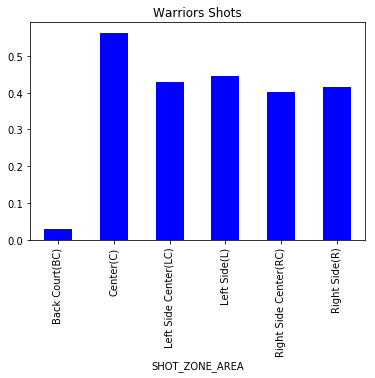

In [62]:
import matplotlib.pyplot as plt
shotdatawarriors.groupby('SHOT_ZONE_AREA')['SHOT_MADE_FLAG'].mean().plot(kind='bar',color='blue')
plt.title("Warriors Shots")
plt.show()

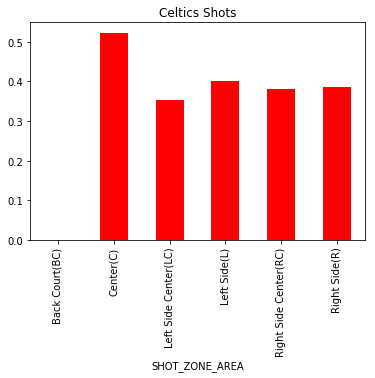

In [64]:
shotdataceltics.groupby('SHOT_ZONE_AREA')['SHOT_MADE_FLAG'].mean().plot(kind='bar',color='red')
plt.title("Celtics Shots")

We can see that the warriors shoot just a bit better than the celtics from every position on the court. 